# Pricing a Convertible Bond (CB)

<u>What is a convertible bond ?</u>   
It is a corporate bond that can be converted into a predetermined number of the issuer's shares at certain times during its life, typically at the discretion of the bondholder. This embedded conversion option provides investors with the potential to benefit from the upside of the issuer's stock while offering downside protection through the bond's fixed-income characteristics.  

Here is some characteristic of this bond : 
* Face Value ($N$): The nominal amount of the bond, which is used to calculate coupon payments and redemption value.

* Conversion Ratio ($Cr$): The number of shares the bondholder receives upon conversion.

* Conversion Price (**S**):* The effective price per share when converting the bond, calculated as:
$S^{\text{*}} =  \frac{N}{Cr}$

* Coupon ($c$): The annual interest payment, expressed as a percentage of the face value.

* Coupon frequence ($fc$) : the frequence of the coupon payment.

* Maturity Date ($T$): The date when the bond expires if not converted or redeemed earlier.

* Redemption Value ($R$): The amount repaid at maturity if the bond is not converted, typically 100% of the face value.

Each of these characteristics are determined in the CB prospectus 

**An European Convertible Bond can be seen as :**   
A straight bond plus a call option that allows the investor to exchange the bond for
equity. These types of bonds can only be converted at maturity. The
 optimal strategy for the bondholder is straightforward, to convert the bond if it is in-the-money at
 maturity.

But in real life most of the convertible bond are **Americain-style** and can be exercised at any time during the life of the product. The optimal strategy is to convert the bond if the immediate conversion value is greater then the value of continuing to hold the bond. These bonds are also common to include embedded put or call options. They also have extra feature wich are mentionned in the last section of this notebook, ***"TO GO FUTHER"*** 

https://en.wikipedia.org/wiki/Convertible_bond

The price of a convertible bond can be calculated with several models, in this presentation we will focus on tree models: Cox Ross Rubinstein, Black and Scholes and to finish, Heston Model. 

## Cox Ross Rubinstein CRR Model

<u>Let's etablish the model for an european call option</u>

Assumption :
- There is no arbitrage  
- Portfolio strategy composed by 2 assets :
    - 1 Bank account : Bt the risk free asset, it's unit 1 invested with the interest rate r 
    - 1 equity asset : St the price of the equity, a random variable, at each time step can go up **u** or down **d** with respectively the probability q, q-1


<p align="center">
    <img src="Binomial_tree.png" alt="drawing" width="1000"/>
</p>

<p align="center">
    <u>The Binomial tree</u>
</p>

* for the first step the stock price could be equal to :
$$
S = q*S_0 + (1-q)S_0
$$
$$
\text{with } q \text{ the probability under the Q measure that the stock price is going up at the following time step} 
$$

* For the non risky asset Bt evolution for each node of the tree :
$$
B_t = e^{r*t} 
$$

* The Derivative payoff C, for an european call option is :**

$$
\text{ for the up children } C_t = \max ( 0, u*S_t-K ) \text{ and for the down children } C_t = \max ( 0, d*S_t-K )
$$

The Law of One Price (LOOP) is a fundamental economic principle that states:
If two financial instruments (or portfolios) provide identical future payoffs in all possible states of the world, they must have the same price today.    

So, an option’s payoff can be replicated by a dynamically adjusted portfolio of the underlying stock and a risk-free bond.
- By LOOP, the option’s price must equal the cost of this replicating portfolio.  

According to the above assumption :
$$
C = \beta S + \alpha B \text{ , with } \beta \text{ the unit of stock in the portfolio } \text{ and } \alpha \text{The amount of 1 invested in the non risky asset}
$$

- Using the two childrens nodes formula of C derivative :
$$
C_u = B_t + \beta S_u = \alpha e^{r*t} * \beta S_u \text{ (1) }
$$
$$
\text{ and } Cd = \alpha e^{r*t} * \beta S_d   \text{ (2) }
$$

$$
\text{Using (1)-(2) : }   
C_u - C_d = \beta * (S_u-S_d)   
$$
$$
\text{So } \beta = \frac{C_u - C_d}{S_u-S_d}  \text{ (3)}
$$
$$
\text{And then by rearranging (2) to isolate } \alpha \text{ : } 
$$
$$
\alpha = e^{-r*t}*(C_d - \beta S_d)  \text{ (4)}
$$

Let's comming back to the initial price of the Derivative :  
Having that Bt is the unit of 1 invested in the r interet rate at date $t_0$ : $B_0 = 1$

$$
C_0 = \alpha B_0 + \beta S_0 = \alpha + \beta S_0 \text{ (5)}
$$

Using  $(4)$ in $(5)$

$$
C_0 = e^{-r*t} * ( C_d - \beta S_d + \beta S_0 * e^{r*t} )
$$
$$
\text{Then applying (3) :}
$$
$$
C_0 = e^{-r*t} * [ C_d + ( \frac{C_u - C_d}{S_u-S_d} ) * ( S_0 * e^{r*t} - S_d ) ] \text{ (6)}
$$


By introducing $q$ as an aggregated factor combining the components of Equation (6) :

$$
q = \frac{S_0*e^{r*t} - S_d}{S_u-S_d}
$$

$$
C_0 = e^{r*t} * [ q * C_u + (1 - q) * C_d ] \text{ (7)}
$$

To draw a parallel with the binomial tree model :
- $q$ is the probability under the $Q$ measure for a derivatives C to going up


As mentionned before : **u** represents the upward multiplicative factor (growth rate) of the stock or derivative price, while **d** denotes the downward multiplicative factor (reduction rate).

This translates to the expressions: $C_u = C_0 * u$ for the upward case, and $C_d= C_0 * d$ for the downward case

There is some bondary for **u** and **d**
$$
0 < d < 1+r < u
$$

- Positivity of the factors is required: neither stock prices nor derivative prices can be negative.
- Due to the no arbitrary assumption $d < 1+r$, meaning that in the worst case scenario we cannot make free money. Same for the $1+r < u$

In the CRR model, **u** and **d** also have a symmetrical relationship:

$$
u*d = 1 \text{ so } u = \frac{1}{d}
$$  


##### **u** and **d** expression :

By using the variance of the log stock price 
$$
Var \left[ ln{ \frac{S(t+\Delta t )}{S(t)} } \right] = \sigma^{2} * \Delta t
$$

it ended up with the following expression 
$$
u = e^{\sigma * \sqrt{\Delta t}} \text{ and } d = e^{-\sigma * \sqrt{\Delta t}}
$$



<u>Coming back to the stock price, to express q as a function of u and d :</u>

In the risk-neutral pricing framework, the expected value of a stochastic process (e.g., stock price $ S_t $ is adjusted to grow at the **risk-free rate  r**. For a stock following Geometric Brownian Motion (GBM), the expected value under $Q$ is:

$$
\mathbb{E}^Q \left[ S_t \right] = S_0 * e^{r t}
$$

In discrete-time models like the Cox-Ross-Rubinstein (CRR) binomial tree, the expected stock price at time $ t + \Delta t $ is:
$$
\mathbb{E}^Q \left[ S_{t + \Delta t} \right] = q * S_u + (1 - q) * S_d
$$

$$
q S_u + (1 - q) S_d = S e^{r \Delta t}
$$

Solving for q :
$$
q = \frac{e^{r \Delta t} - d}{u - d}
$$

This ensures the discounted stock price is a martingale under $Q$.


As in our work the stock pays dividend $\delta$, q became :
$$
q = \frac{e^{ ( r - \delta ) * \Delta \text{t}} - d}{u-d}
$$

# The Value of our Convertible Bond at maturity, in the last level of our binomial tree 

$$
V = \max{(N * R + N * \frac{c}{f_c}, S * Cr)}
$$

Which is the maximum between the stock price multiplied by the conversion ratio, and the bond's notional value plus the coupon payment.

# The Continuation Value
The continuation value is the present value of the expected values of Vu and Vd under the
risk-neutral measure. The formula for the continuation value at time tis given by :   
$$
H = e^{r * \Delta \text{t}} * [q *  V_{u} + (1-q)* V_{d}] 
$$
We add the $N * \frac{c}{f_c}$ coupon payement only if the children/next node, in the tree pays a coupon


# Implementing in python the Cox Ross Rubinstein Model

#### librairies import

In [1]:
import numpy as np
import pandas as pd
#import yfinance as yf
from math import exp, sqrt, log

### Global variable for our work
We are going to work on a simple CB as etablished in this paper without using the credit risk :   
Bardhan, I. - Bergier, A. - Derman, E. - Dosembet, C. - Kani, I. (1994): Valuing Convert-ible Bonds as Derivatives. Technical Report, Goldman Sachs.

In [2]:
# Option variables
# All interests rates are annually componded, 30/360

S0 = 100        # initial stock price 
T = 2           # time to maturity
r = 0.05        # risk free rate
n = 1000          # number of time step
divd = 0.1    # dividends

vol = 0.40      # volatility

# Bond variables

R = 1         # The redemption factor, the percent of the face value payed at maturity
N = 100      # The face value of the bond
c = 0.10        # Coupon payement annual rate
fc = 2          # Coupon frequence
Cr = 1       # Conversion rate The amount of share that will be convert



In [3]:
def crr_convertible_bond(S0, N, R, Cr, T, r, vol, c, fc, n, divd):
    """
    Price a vanilla convertible bond using the CRR binomial tree model.
    
    Args:
        S0 (float): Initial stock price.
        N (float): Face value of the bond.
        R (float): the Redemption rate of the bond
        Cr (float): Conversion ratio (shares per bond).
        T (float): Time to maturity (years).
        r (float): Risk-free rate (continuously compounded).
        sigma (float): Stock volatility.
        c (float): Annual coupon rate (e.g., 0.05 for 5%).
        fc (int): Coupon frequency (e.g., 2 for semi-annual).
        n_steps (int): Number of steps in the binomial tree.
        delta (float): Dividend annual rate
        
    Returns:
        float: Price of the convertible bond (as % of face value).
    """
    
    # Calculate derived parameters
    dt = T/n        # time step size
    if c == 0 :
        coupon = 0
    else : 
        coupon = N * c  / fc  # coupon payment amount
    coupon_dates = np.arange(fc, n+1, n/fc, dtype=int)  # coupon payment steps

    # CRR tree parameters with dividend adjustment
    u = exp(vol * sqrt(dt))  # up factor
    d = 1/u                            # down factor

    # Risk-neutral probability with dividend adjustment
    growth_factor = exp((r) * dt)  # risk-free growth
    dividend_adjustment = exp(-(divd) * dt)  # dividend impact
    q = (growth_factor * dividend_adjustment - d)/(u - d)  # adjusted risk-neutral probability

    # Initialize stock price tree
    stock_tree = np.zeros((n+1, n+1))
    stock_tree[0, 0] = S0

    for i in range(1, n+1):
        stock_tree[i, 0] = stock_tree[i-1, 0] * u
        for j in range(1, i+1):
            stock_tree[i, j] = stock_tree[i-1, j-1] * d

    # Initialize convertible bond value tree
    cb_tree = np.zeros((n+1, n+1))

    # Terminal condition at maturity
    for j in range(n+1):
        # Bond value is max(conversion value, redemption value + final coupon)
        conversion_value = Cr * stock_tree[n, j]
        redemption_value = R * N + coupon
        cb_tree[n, j] = max(conversion_value, redemption_value)

    # Backward induction for American-style conversion
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            # Expected continuation value discounted back
            continuation_value = (q * cb_tree[i+1, j] + (1-q) * cb_tree[i+1, j+1]) / exp((r) * dt)
            
            # Check if coupon is paid at this step
            if (i+1) in coupon_dates:
                continuation_value += coupon
            
            # Conversion value
            conversion_value = Cr * stock_tree[i, j]
         
            # CB value is max(conversion, hold, continuation with coupon if applicable)
            cb_tree[i, j] = max(conversion_value, continuation_value)

    # The price of the convertible bond is the root of the tree
    convertible_bond_price = cb_tree[0, 0]
    return convertible_bond_price


In [4]:
# Test for our exemple :
result = crr_convertible_bond(S0, N, R, Cr, T, r, vol, c = 0, fc=fc, n=n, divd = divd )
print("The price of the American-style convertible bond is :", "{:,.2f} $".format(result).replace(",", " ").replace(".", ",") )

The price of the American-style convertible bond is : 109,16 $


In [5]:
# Greek Analysis 

def compute_greeks(S0, N, R, Cr, T, r, vol, c, fc, n, divd, dS=0.01, dt=1/252, dvol=0.01, dr=0.01):
    """
    Compute Greeks for the convertible bond using the CRR model.
    
    Args:
        dS (float): Small change in stock price for Delta/Gamma.
        dt (float): Small change in time for Theta.
        dvol (float): Small change in volatility for Vega.
        dr (float): Small change in interest rate for Rho.
    Returns:
        dict: Dictionary of Greeks (Delta, Gamma, Theta, Vega, Rho).
    """
    # Base price
    P0 = crr_convertible_bond(S0, N, R, Cr, T, r, vol, c, fc, n, divd)
    
    # Delta & Gamma
    P_plus_S = crr_convertible_bond(S0 + dS, N, R, Cr, T, r, vol, c, fc, n, divd)
    P_minus_S = crr_convertible_bond(S0 - dS, N, R, Cr, T, r, vol, c, fc, n, divd)
    
    Delta = (P_plus_S - P_minus_S) / (2 * dS)
    Gamma = (P_plus_S - 2 * P0 + P_minus_S) / (dS ** 2)
    
    # Theta (use forward difference for T+dt)
    P_plus_T = crr_convertible_bond(S0, N, R, Cr, T + dt, r, vol, c, fc, n, divd)
    Theta = (P_plus_T - P0) / dt  # Sensitivity to time passing (typically reported as negative)
    
    # Vega
    P_plus_vol = crr_convertible_bond(S0, N, R, Cr, T, r, vol + dvol, c, fc, n, divd)
    P_minus_vol = crr_convertible_bond(S0, N, R, Cr, T, r, vol - dvol, c, fc, n, divd)
    Vega = (P_plus_vol - P_minus_vol) / (2 * dvol)
    
    # Rho
    P_plus_r = crr_convertible_bond(S0, N, R, Cr, T, r + dr, vol, c, fc, n, divd)
    P_minus_r = crr_convertible_bond(S0, N, R, Cr, T, r - dr, vol, c, fc, n, divd)
    Rho = (P_plus_r - P_minus_r) / (2 * dr)
    
    return {
        "Delta": Delta,
        "Gamma": Gamma,
        "Theta": Theta,
        "Vega": Vega,
        "Rho": Rho
    }

greeks = compute_greeks(S0, N, R, Cr, T, r, vol, c, fc, n, divd)
print("Greeks:")
for greek, value in greeks.items():
    print(f"{greek}: {value:.4f}")

Greeks:
Delta: 0.5052
Gamma: 0.0054
Theta: -1.3810
Vega: 47.9800
Rho: -126.0252


# The Black & Scholes model

We will not make any refresh on stochastic calculus in this presentation. Hence, we consider that the reader is already able to establish the Black and Scholes Equation with an underlying that follow an Itô process. 
However, we will make a quick flashback to remember what are the processus followed by underlyings in the Black & Scholes model. 

In the Black & Scholes model, the underlying risky asset $S_t$ is considered as a stochastic process, i.e. it evolves randomly over time. An important assumption for the Black-Scholes model is that the stock exhibits a geometric Brownian motion, which we will now delve into. 

### Geometric Brownian Motion:

The geometric Brownian motion is a generalization of the standard Brownian motion, also known as the Wiener process.

A stochastic process S(t) is said to follow a geometric Brownian motion if it satisfies the SDE

$$
     dS(t) = µS(t)dt +σS(t)dW(t)
$$

 where $µ$ and $σ$ > 0 are constants and W(t) is a Wiener process. In order to solve this SDE and find the solution to the stock price S, we use Itô calculus, or more precisely, Itô’s lemma.  Since geometric Brownian motion is an exponentiated Brownian motion, we set $f(t,S(t)) = ln(S(t))$ and apply Itô’s lemma:

$$df(t, S(t)) =(\frac{∂f}{∂t} +µS\frac{∂f}{∂S} + \frac{1}{2}σ²S²\frac{∂²f}{∂S²})*dt + σS\frac{∂f}{∂S}dW(t)$$

The equation now becomes :

$$
dln(S(t)) =(µS · \frac{1}{S} + \frac{1}{2}σ²S² \frac{-1}{S²})*dt+ σS · \frac{1}{S}*dW(t) \\ = (µ-\frac{1}{2}σ²)*dt+σdW(t)
 $$

Then if we integrate this formula between $[0,t]$ we obtain a solution of the SDE :

 $$ S(t) = S(0)e^{(µ−\frac{1}{2}σ²) t+σW(t)}.$$ 
 
This equation gives us the explicit solution to the stock price S at time t with S(0) being the initial value of the stock and W(t) the standard Brownian motion.
In the setting of the Black-Scholes model, the drift µ is usually expressed as the risk-free interest
rate r, because we often do a change of measure to be under the risk free probability and have pricing formulas without any possibility of arbitrage. 

The Black-Scholes model is a mathematical framework that describes the behavior of a financial market that includes derivative instruments. In the model, the Black-Scholes formula describes the value of an option over time, specifically a theoretical value of a European-style contingent claim.
The model assumes no arbitrage opportunities in the market, the stock price is geometric Brownian motion, constant risk-free interest rate r, constant volatility σ and that the stock pays out a constant dividend yield q.

Consider the Black-Scholes model consisting of two assets, a risk-free asset with price process $B$, and a stock with price process $S$, with their dynamics given by:

$$
\left\{
\begin{array}{1}
    \text{$dB(t) = rB(t)dt$} \\
    \text{$dS(t) = rS(t)dt+σS(t)dW(t)$} \\
\end{array}
\right.
$$

In terms of the European call with strike price K and exercise time T, We consider the payoff at time T as :

$$
χ =max(S(T)−K,0),
$$

or more general for the simple contingent claim :

$$
χ =Φ(S(T)),
$$

where $Φ$ is the contract function. We assume that this claim can be traded on a market and that its price $Π(t) = Π(t;Φ)$ can be represented as :

$$
Π(t) = F(t,S(T)),
$$

for some differentiable function F. Under the conditions of Equation 4-6, it can be shown that F is the solution of the following boundary value problem :

$$
\left\{
\begin{array}{1}
    \text{$\frac{∂F}{∂t} + rs\frac{∂F}{∂s}+ \frac{1}{2}σ²s²\frac{∂²F}{∂s²} −rF = 0$} \\
    \text{F(T,s) = Φ(s).} \\
\end{array}
\right.
$$

Then we have that the arbitrage free price of a simple claim $Φ(S(T))$ is given by :

$$
F(t,s) = e^{−r(T−t)}E^{Q}[Φ(S(T))],
$$

where $E^{Q}$ is the expected value under the risk-neutral measure Q, usually called martingale measure. Then it can be shown, under the Black-Scholes Model, that this last equation leads to a well-known analytical expression called the Black-Scholes Formula for the value of a European call option with strike price K and maturity T:

$$
F(t,s) = sN[d_1] −e^{−r(T−t)}KN[d_2].
$$

Where s is today’s stock price and N is the cumulative distribution function for the N(0,1) distribution and:
$$
\left\{
\begin{array}{1}
    \text{$d_1 =\frac{1}{σ\sqrt{T −t}}\{ ln(\frac{s}{K})+(r+\frac{1}{2}σ²)(T −t)\},$} \\
    \text{$d_2 = d1 −σ\sqrt{T −t}.$} \\
\end{array}
\right.
$$

In this setting, we assume the stock price to be the only stochastic process, as in the Black-Scholes market model, and with fixed interest rate and volatility. We also assume that the convertible bond is credit riskless and that the stock pays out a constant dividend yield q. The stock price S(t) follows the SDE : 

$$
\left\{
\begin{array}{1}
    \text{$dS(t) = (r-q)S(t)dt + σS(t)dW(t)$} \\
    \text{$S(0) = S_0 > 0$} \\
\end{array}
\right.
$$

with the Black-Scholes formula at t = 0 and with dividend yield q given by:

$$
F = S_0 e^{-qT}N[d_1] −Ke^{−rT}N[d_2],
$$

$$
\left\{
\begin{array}{1}
    \text{$d_1 =\frac{1}{σ\sqrt{T}}\{ ln(\frac{S_0}{K})+(r-q+\frac{1}{2}σ²)(T)\},$} \\
    \text{$d_2 = d_1 −σ\sqrt{T}.$} \\
\end{array}
\right.
$$

We can use this equation with the payoff for a European convertible bond: 

$$
max(C_r*S(T),R*N)
$$

with the same notations as in the top of the presentation. 
Hence we get the bond price with the following equation:
$$
F(0,S)=e^{-rT}E^{Q}[max(C_r*S(T),R*N]
$$

We can rewrite the term inside the expectation of this equation and we get:

$$
F(0,S)=e^{-rT}E^{Q}[max(C_r*S(T),R*N]\\
=e^{-rT}*R*N+C_rE^{Q}[max(S(T)-\frac{R*N}{C_r},0)] \\ (Monte \ Carlo \ Equation)
$$

We can recognize the expectation as the price of a European call option with strike price $K = \frac{RN}{C_r}$. Hence,
by applying the equation we established before, we get the closed formula for the price of a European convertible bond


$$
CB = F(0,S)=e^{-rT}*RN+C_r\left(S_0e^{-qT}N[d_1]-\frac{RN}{C_r}e^{-rT}N[d_2]\right) \\
=e^{-rT}RN+C_r*S_0*e^{-qT}N[d_1]-RN*e^{-rT}N[d_2] \\
$$

$$
\left\{
\begin{array}{1}
    \text{$d_1 =\frac{1}{σ\sqrt{T}}\{ ln(\frac{S_0*C_r}{RN})+(r-q+\frac{1}{2}σ²)(T)\},$} \\
    \text{$d_2 = d_1 −σ\sqrt{T}.$} \\
\end{array}
\right.
$$

This barely long demonstration showed us that there is a narrow link between the pricing of vanilla options and convertible bonds. Now we set all the theoretical tools we can begin to use them in the wake of finding the CB price!

## Implementing in Python the Black & Scholes model of pricing

#### libraries import

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

In this first form of pricing we use the constants given by this paper; to have homogeneous results and be able to verify our computations : UMEA University - **Pricing Convertible Bonds Using Monte Carlo Simulations** -  <u>*Autor* : *Gustav Marklund Brinell*</u>

#### Parameters definition

In [7]:
## Model parameters in B&S :
S_0 = 100
T=2
r=0.05
q=0.1
sigma=0.4

## Convertible Bond parameters : 
R = 1 # The redemption factor, the percent of the face value payed at maturity
N = 100 #Face value of the bond
c = 0.1 #annualised coupon payment !! Be careful, sometimes 
#coupon rate is announced in its cashflow period. 
frq = 0.5 #bi annual coupon
Cr = 1 #Conversion ratio

K = R*N / Cr # Calcul of the equivalent Strike for Call Option


#### Convertible Bond computation:

In [8]:
def convertible_bs(S0, K, N, T, r, sigma, q):
    d1 = (np.log(S0/K) + (r - q + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    straight_bond = N * np.exp(-r*T)
    call_option = S0*np.exp(-q*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return straight_bond + call_option

bs_price = convertible_bs(S_0, K, N, T, r, sigma, q)
print(f"\nCB price with Black & Scholes Model: {bs_price:.2f}")


CB price with Black & Scholes Model: 105.66


#### Convertible Bond with coupons:
If the issuer of a bond makes periodic interest payments to the bondholders, it is referred to as coupons. These coupons may be paid annually, semi-annually or even quarterly, with a fixed payment amount throughout the bond’s lifetime.
Soif the convertible bond include coupon payments C(t) at time $τ$, where τ ∈ $ω$ coupons and $ω$ couponsrepresents the set of all possible coupon payments, the value C(t) is then added to the convertible bond value CB as 

$$
CB = \sum_{τ ∈ ω_{coupons}}{e^{-rτ}C(t)} +e^{-rT}RN+C_r*S_0*e^{-qT}N[d_1] -RN*e^{-rT}N[d_2]
$$


In [9]:
def coupon_value(coupon_percentage, N, frq,T,r): #We suppose that there is a coupon cashflow at maturity.
    cashflows_t = np.arange(frq,T+frq,frq)
    return np.sum(N*coupon_percentage*frq*np.exp(-r*cashflows_t))

CB_with_coupons = convertible_bs(S_0, K, N, T, r, sigma, q) + coupon_value(c, N, frq, T, r)
print(f"\nCB price with actualised cashflow coupons: {CB_with_coupons:.2f}")



CB price with actualised cashflow coupons: 124.46


## Implementing in Python the pricing with Monte Carlo

#### Principles of Monte Carlo Method
The main idea of the Monte Carlo method is to use the Law of Large Numbers to numerically compute expectations. 

<u> Reminder:</u> \
If $X_1, \dots, X_N$ are i.i.d. draws from the law of $X$ then:
$$
\frac{1}{N} \sum_{i=1}^N X_i \to \mathbb{E}[X] \text{ as } N \to \infty \text{ and in } L^2 \\
$$

The error can be estimated thanks to the Central Limit Theorem:

$$
\frac{1}{N} \sum_{i=1}^N X_i - \mathbb{E}[X] \xrightarrow{\mathcal{L}} \mathcal{N}(0, \frac{\mathrm{Var}[X]}{N})
$$

In the presentation above, we introduced a pricing formula with an expectation and we called it Monte Carlo Formula. 
We will use it to price the value of a CB and compare the result with the analytical value. 

In [10]:
def convertible_bond_monte_carlo(S0, R, N, Cr, T, r, sigma, q, n_simulations=10000):

    #np.random.seed(42)  
    
    K = R*N/Cr # Calcul of the equivalent Strike for Call Option
    
    # Simulation of diffusion process
    Z = np.random.standard_normal(n_simulations)
    ST = S0 * np.exp((r - q - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    # Payoff at T
    payoff = np.maximum(ST-K,0)  # max(remboursement, conversion)
    
    # Payoff discounting
    price = np.exp(-r*T) * (np.mean(payoff)+R*N)
    std_error = np.exp(-r*T) *  np.std(payoff)/np.sqrt(n_simulations)
    
    return price, std_error

# Given parameters
S0 = 100    
R = 1       
N = 100     
Cr = 1      
T = 2       
r = 0.05    
sigma = 0.4 
q = 0.1     

# Price computation
price, std_error = convertible_bond_monte_carlo(S0, R, N, Cr, T, r, sigma, q)
print(f"Price of Convertible Bond with Monte Carlo: {price:.2f}")
print(f"Standard Error: {std_error:.4f}")

Price of Convertible Bond with Monte Carlo: 105.69
Standard Error: 0.3589


## Increasing of precision without computation cost:

#### In this short part we are going introduce methods, in the wake of reducing the error commited by Monte Carlo simulation.
In the formula of the error, there are two parameters we can paly on, N the number of iterations and $\mathbb{V}[X]$ the variance of the processus, here we will use methods to reduce the variance of the process. 

<u> Anthitetic Variables:</u> \
The idea of antithetic variables is to group simulation by pairs $(X^{+}, X^{-})$ where both $X^{+}$ and $X^{-}$ follow the same distribution as X but are negatively correlated together. Then : 

$$
\mathbb{E}\left[\frac{X^+ + X^-}{2}\right] = \mathbb{E}[X^+] = \mathbb{E}[X^-] = \mathbb{E}[X] \\
\mathrm{Var}\left[\frac{X^+ + X^-}{2}\right] = \frac{\mathrm{Var}[X^+] + \mathrm{Var}[X^-] + 2\mathrm{Cov}[X^+, X^-]}{4} \\
= \frac{\mathrm{Var}[X](1 + \rho)}{2} = \frac{\mathrm{Var}[X]}{2}(1 + \rho_{X^+X^-})
$$

The initial vector $(X_{1}, ...,X_{N})$  of i.i.d draws is replaced with N/2 i.i.d pairs $((X^{+}_{1}, X^{-}_1),...,(X^{+}_{N/2},X^{-}_{N/2}))$ and the monte-carlo estimate becomes:

$$
\hat{\mu}_{\text{anti}} = \frac{2}{N} \sum_{i=1}^{N/2} \frac{X_i^+ + X_i^-}{2} \\
\mathbb{V}[\hat{\mu}_{\text{anti}}] = \mathbb{V} \left[ \frac{2}{N} \sum_{i=1}^{N/2} \frac{X_i^+ + X_i^-}{2} \right] = \frac{2}{N} \mathbb{V} \left[ \frac{X_i^+ + X_i^-}{2} \right] \\
= \frac{\mathbb{V}[X^+] + \mathbb{V}[X^-] + 2\text{Cov}[X^+, X^-]}{2N} = \frac{\mathbb{V}[X]}{N} (1 + \rho)
$$

When we use this method we always choose $X^{+}$ and $X^{-}$ that are anti correlated to have $\rho$ < 0 

In [11]:
def mc_convertible_antithetic(S0, R, N, Cr, T, r, sigma, q, n_simulations=10000):
    #np.random.seed(42)
    Z = np.random.standard_normal(n_simulations)
    
    K = R*N/Cr
    
    ST1 = S0 * np.exp((r - q - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    ST2 = S0 * np.exp((r - q - 0.5*sigma**2)*T + sigma*np.sqrt(T)*(-Z))
    
    payoff = 0.5 * (np.maximum(ST1-K,0) + np.maximum(ST2-K,0))
    price = np.exp(-r*T) * (np.mean(payoff)+R*N)
    std_error = np.exp(-r*T) *  np.std(payoff)/np.sqrt(n_simulations)
    
    return price, std_error

# Price computation
price, std_error = mc_convertible_antithetic(S0, R, N, Cr, T, r, sigma, q)  
print(f"Price of Convertible Bond with Monte Carlo and variance reduction antithetic: {price:.2f}")
print(f"Standard error: {std_error:.4f}")
print("Hence we can see that with this method we have a reduction of ~30% on the error")

Price of Convertible Bond with Monte Carlo and variance reduction antithetic: 105.85
Standard error: 0.2310
Hence we can see that with this method we have a reduction of ~30% on the error


<u> Control Variate:</u> \
The goal of control variate method is to find a real number $\alpha$ and a random variable $Y$ such that $\mathbb{E}[Y] = 0$ and $\mathbb{V}[X + \alpha Y] < \mathbb{V}(X)$

$$
\hat{\mu}_{\alpha} = \frac{1}{N} \sum_{i=1}^{N} \left( X^i + \alpha Y^i \right)
$$

$$
\mathbb{V}[\hat{\mu}_{\alpha}] = \frac{\mathbb{V}[X]}{N} + 2\alpha \frac{\text{Cov}[X, Y]}{N} + \alpha^2 \frac{\mathbb{V}[Y]}{N} \ (Minimization \ equation)
$$


**Note:** It is possible to minimize the variance of the estimator by selecting an appropriate value of $\alpha$.


The minimum variance of $\hat{\mu}_{\alpha}$ is reached for $\alpha^{*}$ defined below: to demonstrate this we just have to 
derivate the Minimization equation with respect to alpha. 

$$
\alpha^{*} = -\frac{\text{Cov}[X, Y]}{\mathbb{V}[Y]}
$$

For this value, the variance is equal to: 

$$
\mathbb{V}[\hat{\mu}_{\alpha^{*}}] = \frac{\mathbb{V}[X]}{N} \left(1 - \rho(X, Y)^{2}\right)
$$ 

with $\rho(X, Y)$ being the correlation between $X$ and $Y$. The higher the correlation, the better the overall variance reduction. In our case, we choose to take the final value of S with simulations for the random variable Y. 




In [12]:
def mc_convertible_control_variate(S0, R, N, Cr, T, r, sigma, q, n_simulations=10000):
    np.random.seed(42)
    
    # Generate stock paths
    Z = np.random.standard_normal(n_simulations)
    ST = S0 * np.exp((r - q - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    K = R*N/Cr
    
    # Convertible bond payoff
    payoff = np.maximum(ST - K, 0)
    
    # Control variable: stock price (known expectation)
    control = ST
    expected_control = S0 * np.exp((r - q)*T)
    
    # Calculate optimal alpha coefficient
    cov = np.cov(payoff, control)[0, 1] #np.cov gives the variance/covariance matrix
    var_control = np.var(control)
    alpha =  cov / var_control
    
    # Variance-reduced payoff
    adjusted_payoff = payoff - alpha * (control - expected_control)
    
    # Discount and compute statistics
    discount_factor = np.exp(-r*T)
    price = discount_factor * np.mean(adjusted_payoff+ R*N)
    stderr = discount_factor * np.std(adjusted_payoff)/np.sqrt(n_simulations)
    
    return price, stderr


# Price computation
price, std_error = mc_convertible_control_variate(S0, R, N, Cr, T, r, sigma, q)  
print(f"Price of Convertible Bond with Monte Carlo and variance reduction control variate: {price:.2f}")
print(f"Standard error: {std_error:.4f}")
print("Hence we have a reduction of 100% on the error thanks to the control variate method")

Price of Convertible Bond with Monte Carlo and variance reduction control variate: 105.72
Standard error: 0.1460
Hence we have a reduction of 100% on the error thanks to the control variate method


## Greeks for Bonds convertible:
In the wake of understanding the evolution of this financial products we can use the finite difference method to compute the sensitivities of the Bond. 

This is very interesting, because it shows that out of the money this financial product does not behave exactly like an option. 

C:\Users\pablo\miniconda3\envs\minfo\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


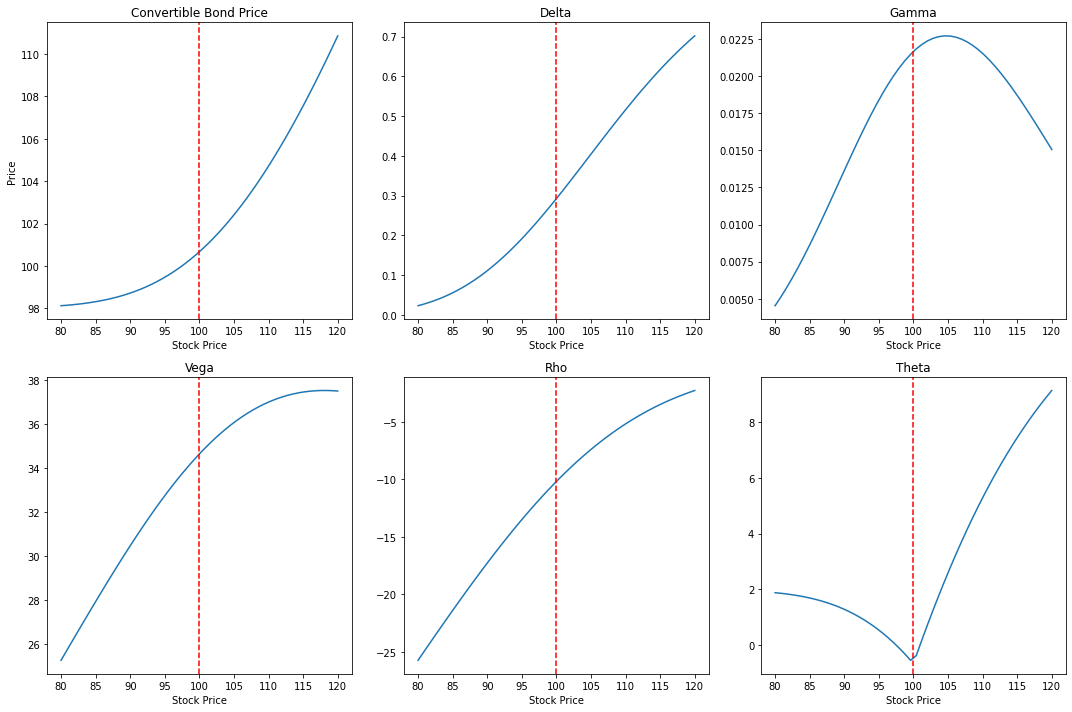

In [15]:
def compute_greeks(S, K, F, T, r, sigma, q, h=1):
    """Compute all Greeks using finite differences"""
    # Base price
    p = convertible_bs(S, K, F, T, r, sigma, q)
    
    # Delta & Gamma
    p_up= convertible_bs(S+h, K, F, T, r, sigma, q)
    p_down= convertible_bs(S-h, K, F, T, r, sigma, q)
    delta = (p_up - p_down)/(2*h)
    gamma = (p_up - 2*p + p_down)/(h**2)
    
    # Vega
    p_vega = convertible_bs(S, K, F, T, r, sigma+h, q)
    vega = (p_vega - p)/h
    
    # Rho
    p_rho = convertible_bs(S, K, F, T, r+h, sigma, q)
    rho = (p_rho - p)/h
    
    # Theta (backward difference)
    p_theta = convertible_bs(S, K, F, T-h, r, sigma, q)
    theta = (p_theta - p)/h
    
    return {
        'price': p,
        'delta': delta,
        'gamma': gamma,
        'vega': vega,
        'rho': rho,
        'theta': theta
    }

# Parameters
params = {
    'K': R*N/Cr,    # Strike/Conversion price
    'F': 100,     # Face value
    'T': 1,       # Years to maturity
    'r': 0.02,    # Risk-free rate
    'sigma': 0.15, # Volatility
    'q': 0.1,     # Dividend yield
}

# Generate spot prices around strike
spot_prices = np.linspace(80, 120, 50)
greek_data = {
    'price': [],
    'delta': [],
    'gamma': [],
    'vega': [],
    'rho': [],
    'theta': []
}

# Compute prices and Greeks for each spot price
for S in spot_prices:
    greeks = compute_greeks(S, **params)
    for key in greek_data:
        greek_data[key].append(greeks[key])

# Plotting
plt.figure(figsize=(15, 10))

# Price curve
plt.subplot(2, 3, 1)
plt.plot(spot_prices, greek_data['price'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Convertible Bond Price')
plt.xlabel('Stock Price')
plt.ylabel('Price')

# Delta
plt.subplot(2, 3, 2)
plt.plot(spot_prices, greek_data['delta'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Delta')
plt.xlabel('Stock Price')

# Gamma
plt.subplot(2, 3, 3)
plt.plot(spot_prices, greek_data['gamma'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Gamma')
plt.xlabel('Stock Price')

# Vega
plt.subplot(2, 3, 4)
plt.plot(spot_prices, greek_data['vega'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Vega')
plt.xlabel('Stock Price')

# Rho
plt.subplot(2, 3, 5)
plt.plot(spot_prices, greek_data['rho'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Rho')
plt.xlabel('Stock Price')

# Theta
plt.subplot(2, 3, 6)
plt.plot(spot_prices, greek_data['theta'])
plt.axvline(x=params['K'], color='r', linestyle='--')
plt.title('Theta')
plt.xlabel('Stock Price')

plt.tight_layout()
plt.show()

# To go Futher

### Convertible Bonds Features

The introduction section introduced the basic properties of convertible bonds. The focus was on
the standard case where investors have only one choice: either they convert into a predeter-
mined number of shares or they do not. However, the market for convertible bonds is innovative
and therefore a variety of specifications on the rights and obligations of issuers and investors
can be found. This section introduces some commonly used features of CBs.

This section introduces the following four features: callability, putability, contingent conversion and soft callability.  

* <u>Callability:</u>   
    In the call periods (t ∈ΩCall) the issuer can enforce the call of the CB by paying
    the early redemption amount (Kc: call price). As the bond holder has the right to convert the
    CB into shares and will do so if he earns more than Kc, such a conversion is called forced
    conversion.   

* <u>Putability:</u>   
    In the put periods (t∈ΩPut) the bond holder can give the convertible bond back to
    the issuer at a predetermined amount called the put price (Kp).  

* <u>Contingent Conversion:</u>   
    In the contingent conversion periods (t ∈ΩCoCo) there is a restric-
    tion on the conversion, the investor cannot convert the bond into shares unless the equity price
    is higher than a contingent conversion threshold.   

* <u>Soft Callability:</u>   
    In the periods when soft callability applies (t ∈ΩSoftCall) the issuer is re-
    stricted from calling the bond unless the underlying equity trades above a certain threshold
    (KSoftCall).   

These features can be active in discrete set of dates (discrete type) or during a specific time
interval (continuous type). Callability, soft callability and contingent conversion are typically
continuous features while putability is typically discrete.  

These features must be clearly be reflected in a pricing model. 

### 7 exit schenarios according to Spiegeleer and Schoutens
Spiegeleer, J. D. - Schoutens, W. (2011): The Handbook of Convertible Bonds. John
Wiley & Sons.   

1. <u>Default:</u>   
    In case of default, the bond holders will get an amount based on the ranking of the
    bond in the company’s capital structure (recovery value). Time until settlement is typically con-
    siderable.   

2. <u>Put:</u>   
    The bondholder can put the bond back to the issuer at the put price in the predetermined
    put periods.   

3. <u>Forced Conversion:</u>  
    The issuer can call the bond back from the investor at the call price in the
    predetermined call periods. Technically the issuer gives a call notice to the investor about the 
    call action, and the investor can decide whether to convert after the call or not. If the investor
    converts the bond, it is called forced conversion.

4. <u>Optional Conversion:</u>   
    The investor decides to convert the CB into shares (without a call no-
    tice).   

5. <u>Call:</u>   
    The issuer calls the bond back from the bond holder and the bond holder is not convert-
    ing the bond.   

6. <u>Redemption at Maturity:</u>   
    The bond has not been called, put or converted before maturity and
    at maturity the conversion value is below the payout of the redemption amount plus the final
    coupon payment.    

7. <u>Conversion at Maturity:</u>   
    The bond has not been called, put or converted before maturity and
    at maturity the investor chooses to convert the CB into shares.   


